<a href="https://colab.research.google.com/github/prasannashrestha011/ML_exercises/blob/main/FashionMinistClassification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [43]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

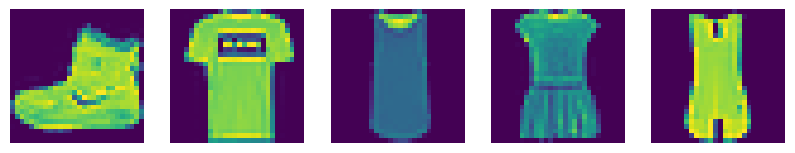

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
for i in range(5):
    plt.subplot(1, 5, i+1)   # 1 row, 5 columns
    plt.imshow(X_train[i], cmap="viridis")  # grayscale
    plt.axis("off")          # hide axis
plt.show()

In [45]:
X_train=X_train.reshape(-1,28,28,1)/255.0
X_test=X_test.reshape(-1,28,28,1)/255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [46]:


model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.fit(X_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7212 - loss: 0.7872
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8629 - loss: 0.3797
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8868 - loss: 0.3161
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8991 - loss: 0.2791
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9063 - loss: 0.2575
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.2392
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9210 - loss: 0.2150
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9267 - loss: 0.1995
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9302 - loss: 0.1875
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9402 - loss: 0.1665


In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9058 - loss: 0.2642
Loss: 0.2501
Accuracy: 0.9085


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
True label: Coat
Predicted label: Coat


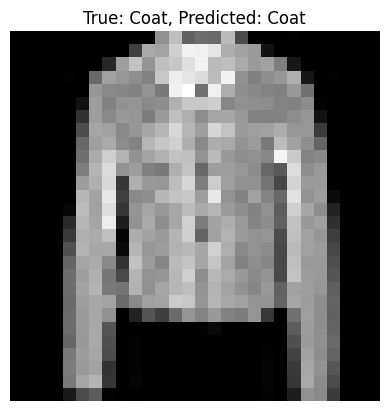

In [49]:
# Class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


sample_idx = 10
sample_image = X_test[sample_idx].reshape(1, 28, 28, 1)


predicted_class = np.argmax(model.predict(sample_image), axis=1)[0]
true_class = np.argmax(y_test[sample_idx])

print(f"True label: {class_names[true_class]}")
print(f"Predicted label: {class_names[predicted_class]}")


import matplotlib.pyplot as plt
plt.imshow(X_test[sample_idx], cmap="gray")
plt.title(f"True: {class_names[true_class]}, Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()
